<a href="https://colab.research.google.com/github/samraat-d/News-Classification/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

In [13]:
import nltk
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
fake = pd.read_csv('drive/My Drive/Datasets/News Classification/Fake.csv')
genuine = pd.read_csv('drive/My Drive/Datasets/News Classification/True.csv')

In [5]:
display(fake.info())
display(genuine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [6]:
display(fake.subject.value_counts())

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [7]:
fake['target'] = 0
genuine['target'] = 1

In [10]:
data = pd.concat([fake,genuine],axis=0)
data = data.reset_index(drop=True)
data = data.drop(['subject','date','title'],axis=1)
print(data.columns)

Index(['text', 'target'], dtype='object')


In [11]:
# Tokenization
from nltk.tokenize import word_tokenize

In [14]:
data['text'] = data['text'].apply(word_tokenize)
print(data.head(10))

                                                text  target
0  [Donald, Trump, just, couldn, t, wish, all, Am...       0
1  [House, Intelligence, Committee, Chairman, Dev...       0
2  [On, Friday, ,, it, was, revealed, that, forme...       0
3  [On, Christmas, day, ,, Donald, Trump, announc...       0
4  [Pope, Francis, used, his, annual, Christmas, ...       0
5  [The, number, of, cases, of, cops, brutalizing...       0
6  [Donald, Trump, spent, a, good, portion, of, h...       0
7  [In, the, wake, of, yet, another, court, decis...       0
8  [Many, people, have, raised, the, alarm, regar...       0
9  [Just, when, you, might, have, thought, we, d,...       0


In [15]:
# Stemming
from nltk.stem.snowball import SnowballStemmer
porter = SnowballStemmer("english", ignore_stopwords=False)
def stem_it(text):
  return [porter.stem(word) for word in text]
data['text'] = data['text'].apply(stem_it)
print(data.head(10))

                                                text  target
0  [donald, trump, just, couldn, t, wish, all, am...       0
1  [hous, intellig, committe, chairman, devin, nu...       0
2  [on, friday, ,, it, was, reveal, that, former,...       0
3  [on, christma, day, ,, donald, trump, announc,...       0
4  [pope, franci, use, his, annual, christma, day...       0
5  [the, number, of, case, of, cop, brutal, and, ...       0
6  [donald, trump, spent, a, good, portion, of, h...       0
7  [in, the, wake, of, yet, anoth, court, decis, ...       0
8  [mani, peopl, have, rais, the, alarm, regard, ...       0
9  [just, when, you, might, have, thought, we, d,...       0


In [16]:
# Stopword Removal
from nltk.corpus import stopwords
def stop_it(t):
  dt = [word for word in t if len(word)>2]
  return dt

data['text'] = data['text'].apply(stop_it)
print(data.head(10))

                                                text  target
0  [donald, trump, just, couldn, wish, all, ameri...       0
1  [hous, intellig, committe, chairman, devin, nu...       0
2  [friday, was, reveal, that, former, milwauke, ...       0
3  [christma, day, donald, trump, announc, that, ...       0
4  [pope, franci, use, his, annual, christma, day...       0
5  [the, number, case, cop, brutal, and, kill, pe...       0
6  [donald, trump, spent, good, portion, his, day...       0
7  [the, wake, yet, anoth, court, decis, that, de...       0
8  [mani, peopl, have, rais, the, alarm, regard, ...       0
9  [just, when, you, might, have, thought, get, b...       0


In [18]:
data['text'] = data['text'].apply(' '.join)

In [19]:
# Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['text'], data['target'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())

,text
81,conserv should shun toni perkin for this.earli...
13409,democrat are the parti kkk the problem you kee...
18299,while mani the left continu accus presid trump...
8243,florida republican senat and presidenti hope m...
29573,reuter u.s. presid donald trump address busi a...


,target
81,0
13409,0
18299,0
8243,0
29573,1


In [20]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
my_tfid = TfidfVectorizer(max_df = 0.7)

tfid_train = my_tfid.fit_transform(X_train)
tfid_test = my_tfid.transform(X_test)
print(tfid_train)

  (0, 89145)	0.060161678421320454
  (0, 41041)	0.023903520703482426
  (0, 31412)	0.025142539314940107
  (0, 13353)	0.050934440497445194
  (0, 24707)	0.04225478710627218
  (0, 81483)	0.015463583698623164
  (0, 11755)	0.06838070350534398
  (0, 66133)	0.04592393898570143
  (0, 78132)	0.02652434776898559
  (0, 17751)	0.018844999068426464
  (0, 82362)	0.020010175344914956
  (0, 79213)	0.03360566814535773
  (0, 1604)	0.03311040660338018
  (0, 8273)	0.03321415657903607
  (0, 84231)	0.020901007956552035
  (0, 44889)	0.020097752348678975
  (0, 37598)	0.02923812027298865
  (0, 9019)	0.017993813800962228
  (0, 42876)	0.03383628668224048
  (0, 81524)	0.02621826758676531
  (0, 23843)	0.048470803014524
  (0, 25739)	0.022525204182349056
  (0, 59040)	0.04380191410869155
  (0, 81314)	0.0424982624283523
  (0, 41761)	0.030611217689205078
  :	:
  (33672, 41041)	0.03129743584347629
  (33672, 81483)	0.020246829942811566
  (33672, 82362)	0.02619978817526022
  (33672, 13456)	0.027587052908055743
  (33672, 732

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
model_1 = LogisticRegression(max_iter=900)
model_1.fit(tfid_train,y_train)
pred_1 = model_1.predict(tfid_test)
cr1 = accuracy_score(y_test,pred_1)
print(cr1*100)

98.79732739420936


In [23]:
# Passive Agressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfid_train,y_train)
pred_2 = model.predict(tfid_test)
cr2 = accuracy_score(y_test,pred_2)
print(cr2*100)

99.61692650334075


In [33]:
# Decision Tree

clf = DecisionTreeClassifier()
clf.fit(tfid_train,y_train)
pred_3 = clf.predict(tfid_test)
cr3 = accuracy_score(y_test,pred_3)
print(cr3*100)

99.66146993318486


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5874
           1       0.99      0.99      0.99      5351

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



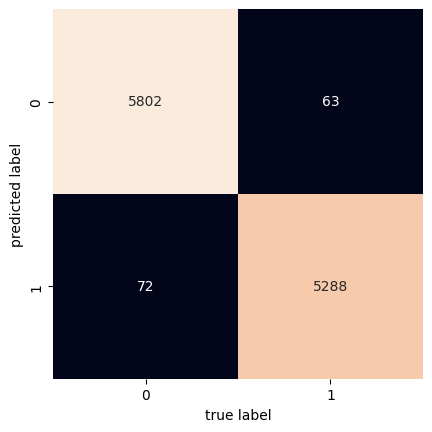

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

mat1 = confusion_matrix(y_test, pred_1)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5874
           1       1.00      1.00      1.00      5351

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



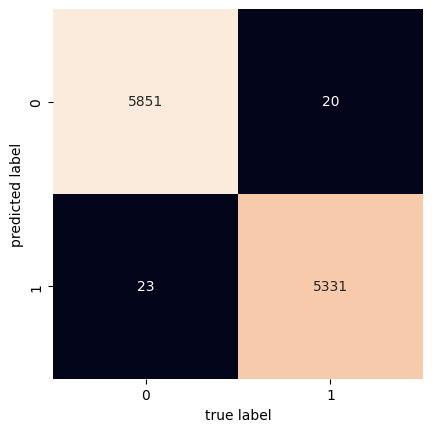

In [28]:
mat2 = confusion_matrix(y_test, pred_2)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5874
           1       1.00      1.00      1.00      5351

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



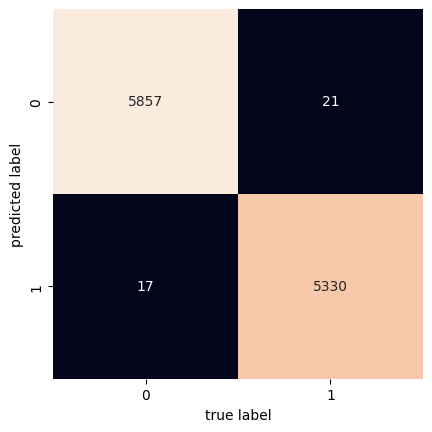

In [34]:
mat3 = confusion_matrix(y_test, pred_3)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print(classification_report(y_test,pred_3))